In [ ]:
import powerdominationtoolbox as pdt

import os
import networkx as nx
import itertools as it

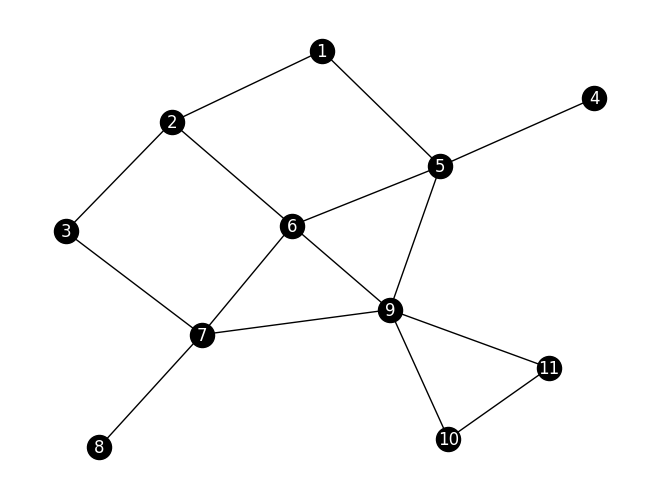

In [31]:
graph = nx.read_adjlist(os.path.join(os.getcwd(), 'Zim_Graph', 'adjlist.txt'))

nx.draw_kamada_kawai(graph, node_color='black', font_color='white', with_labels=True)

# Zero Forcing

In [3]:
initial_blue_vertices = ['1', '2', '3']
resultant_blue_vertices = pdt.ZeroForce(graph, initial_blue_vertices)
print(resultant_blue_vertices)

{'1', '4', '3', '8', '2', '7', '9', '5', '6'}


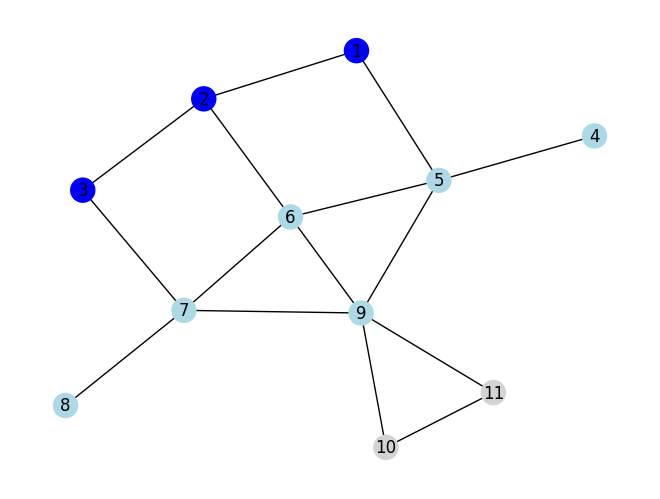

In [ ]:
vertex_colors = [
    'blue' if vertex in initial_blue_vertices else 
    'lightblue' if vertex in resultant_blue_vertices else 
    'lightgrey' 
    for vertex in graph.nodes()
]
nx.draw_kamada_kawai(graph, node_color=vertex_colors, with_labels=True)

# Domination

In [5]:
initial_blue_vertices = ['1', '2', '3']
resultant_blue_vertices = pdt.Dominate(graph, initial_blue_vertices)
print(resultant_blue_vertices)

{'1', '3', '2', '7', '5', '6'}


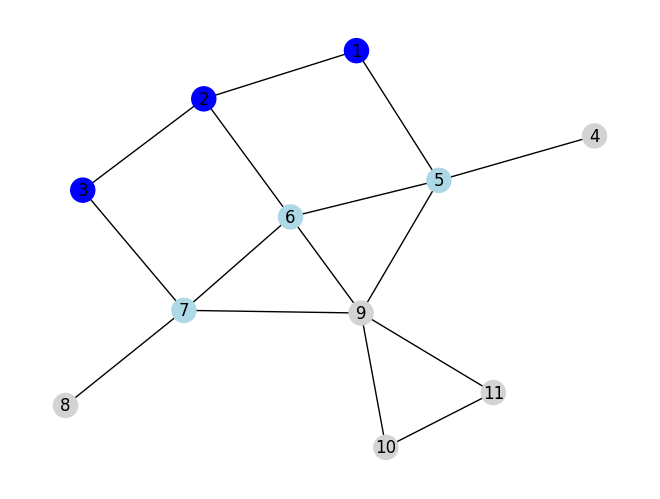

In [ ]:
vertex_colors = [
    'blue' if vertex in initial_blue_vertices else 
    'lightblue' if vertex in resultant_blue_vertices else 
    'lightgrey' 
    for vertex in graph.nodes()
]
nx.draw_kamada_kawai(graph, node_color=vertex_colors, with_labels=True)

# Power Domination

In [7]:
initial_blue_vertices = ['2', '9']
resultant_blue_vertices = pdt.PowerDominate(graph, initial_blue_vertices)
print(resultant_blue_vertices)

{'1', '4', '3', '8', '2', '7', '9', '11', '5', '10', '6'}


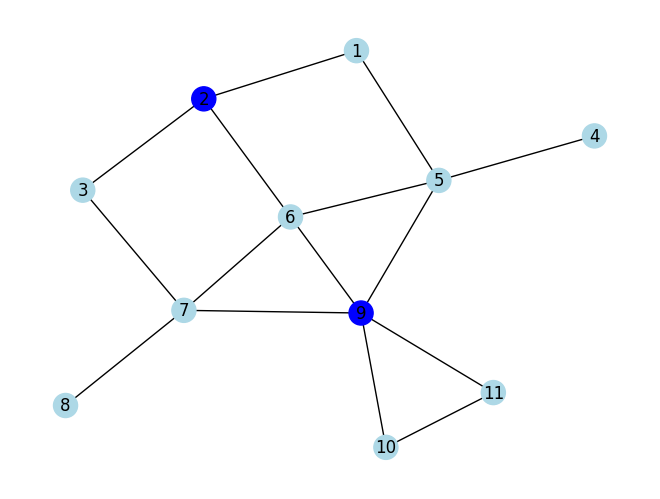

In [ ]:
vertex_colors = [
    'blue' if vertex in initial_blue_vertices else 
    'lightblue' if vertex in resultant_blue_vertices else 
    'lightgrey' 
    for vertex in graph.nodes()
]
nx.draw_kamada_kawai(graph, node_color=vertex_colors, with_labels=True)

# Standard Brute-Force Method

In [9]:
minimum_power_dominating_set = pdt.JLBW_minpds(graph)
print(minimum_power_dominating_set)

['1', '9']


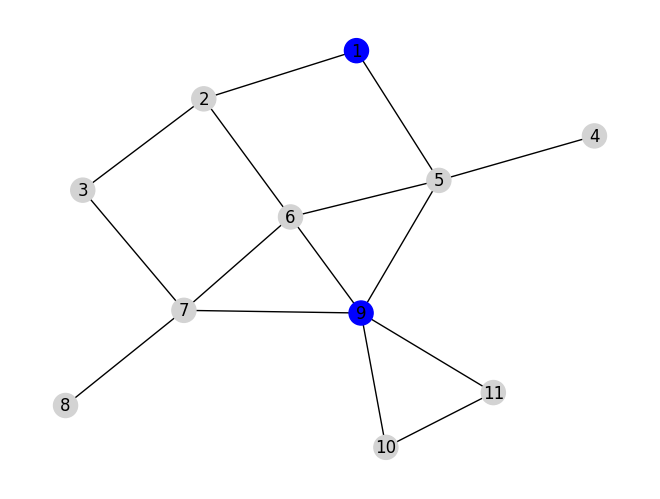

In [ ]:
vertex_colors = [
    'blue' if vertex in minimum_power_dominating_set else
    'lightgrey' 
    for vertex in graph.nodes()
]
nx.draw_kamada_kawai(graph, node_color=vertex_colors, with_labels=True)

# PDT Method for Minimum Power Dominating Set

In [11]:
minimum_power_dominating_set = pdt.PDT_minpds(graph)
print(minimum_power_dominating_set)

['9', '5']


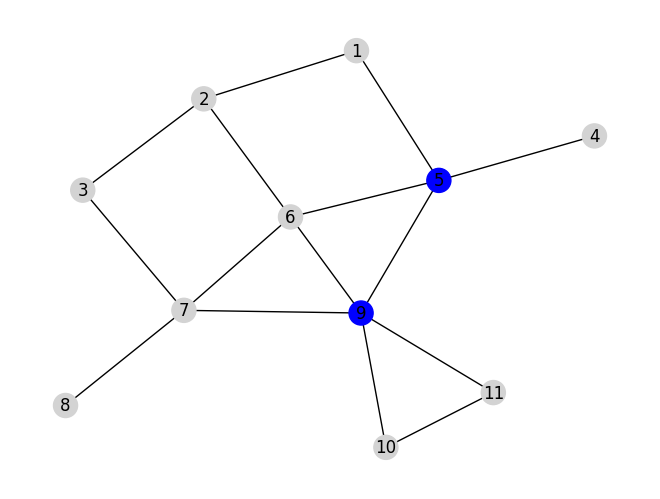

In [ ]:
vertex_colors = [
    'blue' if vertex in minimum_power_dominating_set else
    'lightgrey' 
    for vertex in graph.nodes()
]
nx.draw_kamada_kawai(graph, node_color=vertex_colors, with_labels=True)

# Component Pieces of the PDT

In [13]:
preferred_vertices = pdt.Pref(graph)
print(preferred_vertices)

['9']


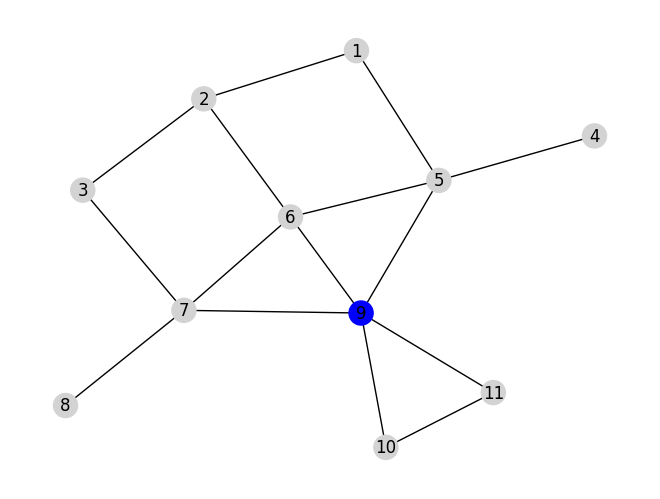

In [ ]:
vertex_colors = [
    'blue' if vertex in preferred_vertices else
    'lightgrey' 
    for vertex in graph.nodes()
]
nx.draw_kamada_kawai(graph, node_color=vertex_colors, with_labels=True)

# More Complicated Graph

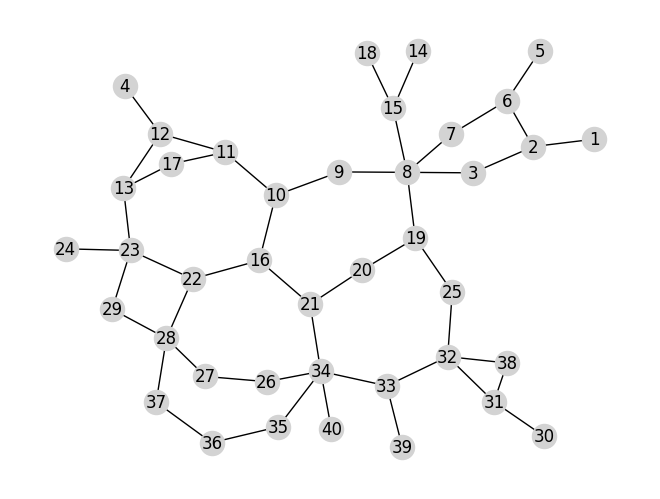

In [15]:
graph = nx.read_adjlist(os.path.join(os.getcwd(), 'Modified_NE', 'adjlist.txt'))
nx.draw_kamada_kawai(graph, node_color='lightgrey', with_labels=True)

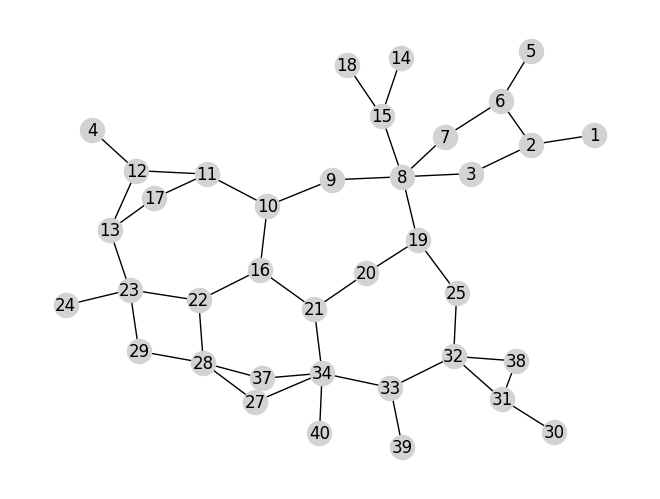

In [16]:
graph = pdt.ContractGraph(graph)
nx.draw_kamada_kawai(graph, node_color='lightgrey', with_labels=True)

In [17]:
preferred_vertices = pdt.Pref(graph)
print(preferred_vertices)

['15', '8', '32']


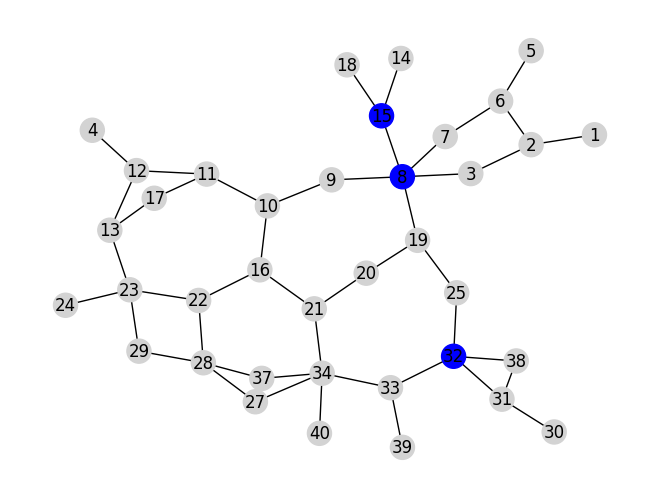

In [ ]:
vertex_colors = [
    'blue' if vertex in preferred_vertices else
    'lightgrey' 
    for vertex in graph.nodes()
]
nx.draw_kamada_kawai(graph, node_color=vertex_colors, with_labels=True)

In [19]:
blue_vertices = pdt.PowerDominate(graph, preferred_vertices)
print(blue_vertices)

{'18', '3', '8', '25', '2', '21', '38', '15', '10', '31', '32', '19', '1', '7', '9', '33', '20', '5', '30', '6', '14'}


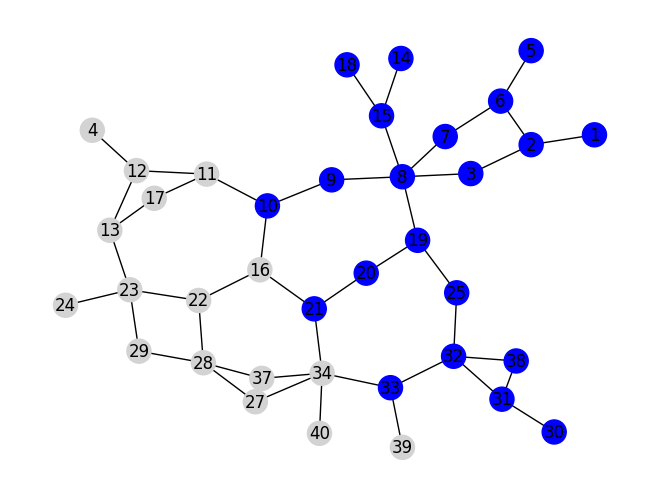

In [ ]:
vertex_colors = [
    'blue' if vertex in blue_vertices else
    'lightgrey' 
    for vertex in graph.nodes()
]
nx.draw_kamada_kawai(graph, node_color=vertex_colors, with_labels=True)

In [21]:
active_vertices = pdt.active_vertices(graph, blue_vertices)
print(active_vertices)

{'34', '13', '12', '16', '21', '33', '11', '23', '28', '10', '22'}


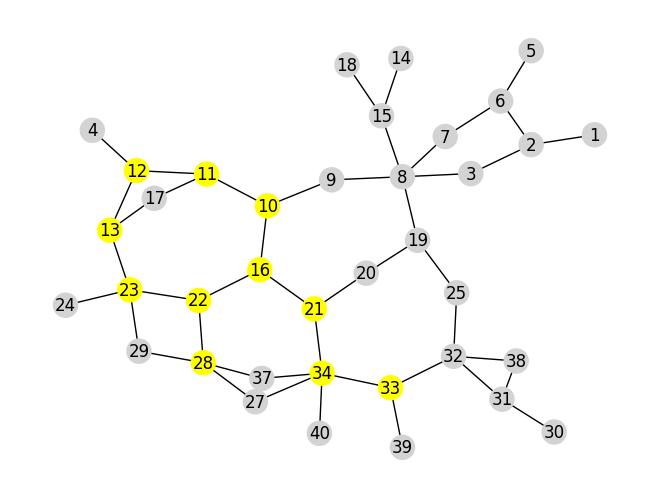

In [ ]:
vertex_colors = [
    'yellow' if vertex in active_vertices else
    'lightgrey' 
    for vertex in graph.nodes()
]
nx.draw_kamada_kawai(graph, node_color=vertex_colors, with_labels=True)

In [23]:
four_cycles = pdt.reduce_cycle_forts(graph)
print(four_cycles)

[{'27', '37'}]


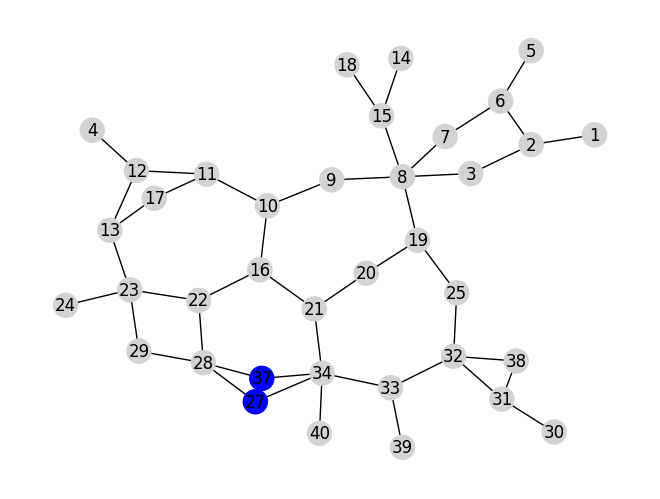

In [ ]:
vertex_colors = [
    'blue' if vertex in it.chain(*four_cycles) else
    'lightgrey' 
    for vertex in graph.nodes()
]
nx.draw_kamada_kawai(graph, node_color=vertex_colors, with_labels=True)

In [25]:
four_cycle_entrances = [pdt.entrance(graph, cycle) for cycle in four_cycles]
print(four_cycle_entrances)

[{'34', '28'}]


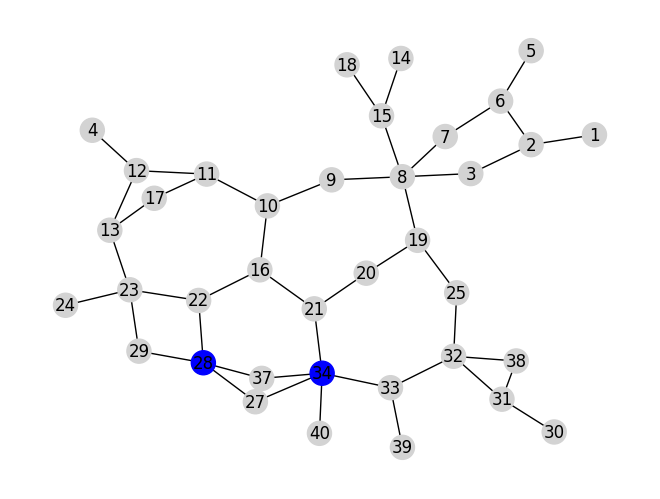

In [ ]:
vertex_colors = [
    'blue' if vertex in it.chain(*four_cycle_entrances) else
    'lightgrey' 
    for vertex in graph.nodes()
]
nx.draw_kamada_kawai(graph, node_color=vertex_colors, with_labels=True)

In [27]:
from powerdominationtoolbox.powerdominationtoolbox import _potential_pds_iterator

In [28]:
number_of_additional_vertices = 0
potential_power_dominating_sets_of_order_3 = [item for item in _potential_pds_iterator(preferred_vertices, four_cycle_entrances, active_vertices, number_of_additional_vertices)]
for item in potential_power_dominating_sets_of_order_3:
    print(item)

In [29]:
number_of_additional_vertices = 1
potential_power_dominating_sets_of_order_4 = [item for item in _potential_pds_iterator(preferred_vertices, four_cycle_entrances, active_vertices, number_of_additional_vertices)]
for item in potential_power_dominating_sets_of_order_4:
    print(item)

['15', '8', '32', '34']
['15', '8', '32', '28']


In [30]:
number_of_additional_vertices = 2
potential_power_dominating_sets_of_order_5 = [item for item in _potential_pds_iterator(preferred_vertices, four_cycle_entrances, active_vertices, number_of_additional_vertices)]
for item in potential_power_dominating_sets_of_order_5:
    print(item)

['15', '8', '32', '34', '13']
['15', '8', '32', '34', '12']
['15', '8', '32', '34', '16']
['15', '8', '32', '34', '21']
['15', '8', '32', '34', '33']
['15', '8', '32', '34', '11']
['15', '8', '32', '34', '23']
['15', '8', '32', '34', '28']
['15', '8', '32', '34', '10']
['15', '8', '32', '34', '22']
['15', '8', '32', '13', '28']
['15', '8', '32', '12', '28']
['15', '8', '32', '16', '28']
['15', '8', '32', '21', '28']
['15', '8', '32', '33', '28']
['15', '8', '32', '11', '28']
['15', '8', '32', '23', '28']
['15', '8', '32', '28', '10']
['15', '8', '32', '28', '22']
